# Location Intelligence Data Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
np.random.seed = 42

import warnings
warnings.filterwarnings('ignore')

# EDA

### Problem statement

???

### Dataset Overview

Google Places Comprehensive Business Dataset has been meticulously scraped from Google Maps and presents extensive information about businesses across several countries. Each entry in the dataset provides detailed insights into business operations, location specifics, customer interactions, and much more, making it an invaluable resource for data analysts and scientists looking to explore business trends, geographic data analysis, or consumer behaviour patterns.

### Data description

The dataset contains 46 columns, providing a thorough profile for each listed business.

Key columns:

| Column Name           | Description                                      |
|:----------------------|:-------------------------------------------------|
| business_id          |A unique Google Places identifier for each business, ensuring distinct entries. |
| phone_number         |The contact number associated with the business. It provides a direct means of communication.|
| name                 |The official name of the business as listed on Google Maps.|
| full_address         |The complete postal address of the business, including locality and geographic details.|
| latitude             |The geographic latitude coordinate of the business location, useful for mapping and spatial analysis.|
| longitude            |The geographic longitude coordinate of the business location.|
| review_count         |The total number of reviews the business has received on Google Maps.|
| rating               |The average user rating out of 5 for the business, reflecting customer satisfaction.|
| timezone             |The world timezone the business is located in, important for temporal analysis.|
| website              |The official website URL of the business, providing further information and contact options.|
| place_id              |A unique Google Place ID |
| place_link            |A link to the business on Google Maps |
| Friday                |The opening hours on Friday |
| Saturday              |The opening hours on Saturday |
| Sunday                |The opening hours on Sunday |
| Monday                |The opening hours on Monday |
| Tuesday               |The opening hours on Tuesday |
| Wednesday             |The opening hours on Wednesday |
| Thursday              |The opening hours on Thursday | 
| city                  |The city where the business is located |
| state                 |The current status - Open / Closed and when that will change | 
| types                 |The category or type of service the business provides, such as restaurant, museum, etc. |
| verified              |Indicates whether the business listing has been claimed by the owner on Google Maps |
|geo_cluster |A clustering identifier used to group similar businesses based on geographic or other clustering algorithms.|
|country |The country where the business is located, important for regional analysis.|

Operational Hours by Day

Each day is split into three parts: morning, afternoon, and evening. The operational status during these times is represented as binary flags (0 or 1):  


| Column Name           | Description                                      |
|:----------------------|:-------------------------------------------------|
| Monday_morning | Indicates if the business is operational Monday morning.| 
| Monday_afternoon|  Indicates if the business is operational Monday afternoon.|
| Monday_evening |Indicates if the business is operational Monday evening.|

Similar fields for Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday.

### EDA

In [2]:
df = pd.read_csv('./DATA/google_places_data.csv')

In [3]:
df.head()

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,Unknown,حصن الظفرة Al Dhafra Fort,PXMJ+H7J حصن الظفرة Al Dhafra Fort - Unnamed R...,23.733973,53.980629,58.0,4.7,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,971569049905,Rafiullah,MP4R+WQJ Rafiullah - Zayed City - Abu Dhabi - ...,23.657332,53.741881,3.0,3.0,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,96822081500,National Museum of Oman,"National Museum of Oman, opposite Al Alam Pala...",23.611601,58.593728,3499.0,4.6,Asia/Muscat,https://www.nm.gov.om/,...,0,0,0,0,0,0,0,0,0.0,Oman
3,0x487bb1e7815c44db:0x417132a42bd93ef6,443300580058,Science and Industry Museum,"Science and Industry Museum, Liverpool Rd, Man...",53.477136,-2.254582,17398.0,4.4,Europe/London,https://www.scienceandindustrymuseum.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
4,0x487e78e1955eb419:0x4c55c87f0a46d173,441913704000,"Beamish, the Living Museum of the North","Beamish, the Living Museum of the North, Stanl...",54.884752,-1.659321,21957.0,4.8,Europe/London,https://www.beamish.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom


In [4]:
df.shape

(15203, 46)

In [5]:
df.describe()

,latitude,longitude,review_count,rating,Friday_morning,Friday_afternoon,Friday_evening,Saturday_morning,Saturday_afternoon,Saturday_evening,...,Tuesday_morning,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster
count,15198.000000,15198.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,...,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15198.000000
mean,33.180311,24.517834,709.113136,4.287417,0.106624,0.106624,0.106624,0.108860,0.108860,0.108860,...,0.108794,0.108794,0.108794,0.108926,0.108926,0.108926,0.108860,0.108860,0.108860,0.698316
std,12.249122,50.581680,5657.130516,0.669842,0.308644,0.308644,0.308644,0.311474,0.311474,0.311474,...,0.311391,0.311391,0.311391,0.311556,0.311556,0.311556,0.311474,0.311474,0.311474,0.980758
min,-45.577163,-157.870613,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.260005,5.276266,8.000000,4.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.311978,55.284218,32.000000,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.291451,55.370963,114.000000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,70.032732,176.230310,256877.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   business_id          15203 non-null  object 
 1   phone_number         15203 non-null  object 
 2   name                 15203 non-null  object 
 3   full_address         15203 non-null  object 
 4   latitude             15198 non-null  float64
 5   longitude            15198 non-null  float64
 6   review_count         15203 non-null  float64
 7   rating               15203 non-null  float64
 8   timezone             15203 non-null  object 
 9   website              15203 non-null  object 
 10  place_id             15203 non-null  object 
 11  place_link           15203 non-null  object 
 12  types                15203 non-null  object 
 13  Friday               15203 non-null  object 
 14  Saturday             15203 non-null  object 
 15  Sunday               15203 non-null 

##### Rows with missing values:

In [7]:
df[df.isnull().any(axis=1)]

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
5355,0x80dd4a6f6bc3c0d1:0xa0dbcc9e52e67a7d,13105300994,"R Painting,License #752512",Unknown,NaN,NaN,32.0,4.4,America/Los_Angeles,Unknown,...,0,0,0,0,0,0,0,0,NaN,United Arab Emirates
5368,0x549175bad87e4499:0xe474185a7c812203,13608880460,IJB Painting Company,Unknown,NaN,NaN,32.0,4.4,America/Los_Angeles,Unknown,...,0,0,0,0,0,0,0,0,NaN,United Arab Emirates
7683,0x3e5f43a21c43cf97:0x5ab0bd09eee41976,971524175130,S&Y Travel Agency,Unknown,NaN,NaN,32.0,4.4,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,NaN,United Arab Emirates
8571,0xb2afb323ceda5e5:0x9616560c124aa170,971509014567,Luxury District Real Estate,Unknown,NaN,NaN,32.0,4.4,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,1,NaN,United Arab Emirates
12398,0x886b5c66fee9323d:0x3aa2c26684beba68,18137481822,Election Roofing and Construction LLC,Unknown,NaN,NaN,1.0,4.0,America/New_York,https://election-roofing-and-construction-llc....,...,0,0,0,0,0,0,0,0,NaN,United Arab Emirates


There are only 5 rows with missing values, they make 0.03% of the dataframe, so we will delete them.

In [8]:
df = df.dropna(how='any').reset_index(drop = True)

In [9]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
business_id,15103
phone_number,11277
name,14187
full_address,14737
latitude,14418
longitude,14422
review_count,1819
rating,40
timezone,112
website,7529


The business_id column according to the dataset description is a unique identifier, however there is only 15103 unique values in 15198 total values.

##### Dupicated rows

In [10]:
grouped_counts = df.groupby('business_id', as_index=False).count()
duplicated_business_ids = grouped_counts[grouped_counts['name'] > 1]['business_id'].values
duplicated_rows = df[df['business_id'].isin(duplicated_business_ids)].sort_values(by='business_id').reset_index(drop=True)

duplicated_rows[['types']]

,types
0,"Shoe store, Barber shop, Cafe"
1,"Cafe, Barber shop, Shoe store"
2,"Plumber, Air conditioning contractor, Air cond..."
3,"Painter, Air conditioning contractor, Air cond..."
4,"Convenience store, ATM, Auto electrical servic..."
...,...
185,"Bank, ATM"
186,"ATM, Bank"
187,"Bank, ATM"
188,"Bank, ATM"


Rows with identical business_id are the same, except for types column, but the only difference in this column is order of elements, so we will delete the duplicates

### Train, Validation and Test Sets

In [11]:
X_dev, X_test = train_test_split(df, test_size=0.3, random_state=42)
X_train, X_val = train_test_split(X_dev, test_size=0.3, random_state=42)

In [12]:
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
top = cm.get_cmap('Greens_r', 128) # r means reversed version
bottom = cm.get_cmap('Blues', 128)# combine it all
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))# create a new colormaps with a name of OrangeBlue
green_blue = ListedColormap(newcolors, name='GreenBlue')

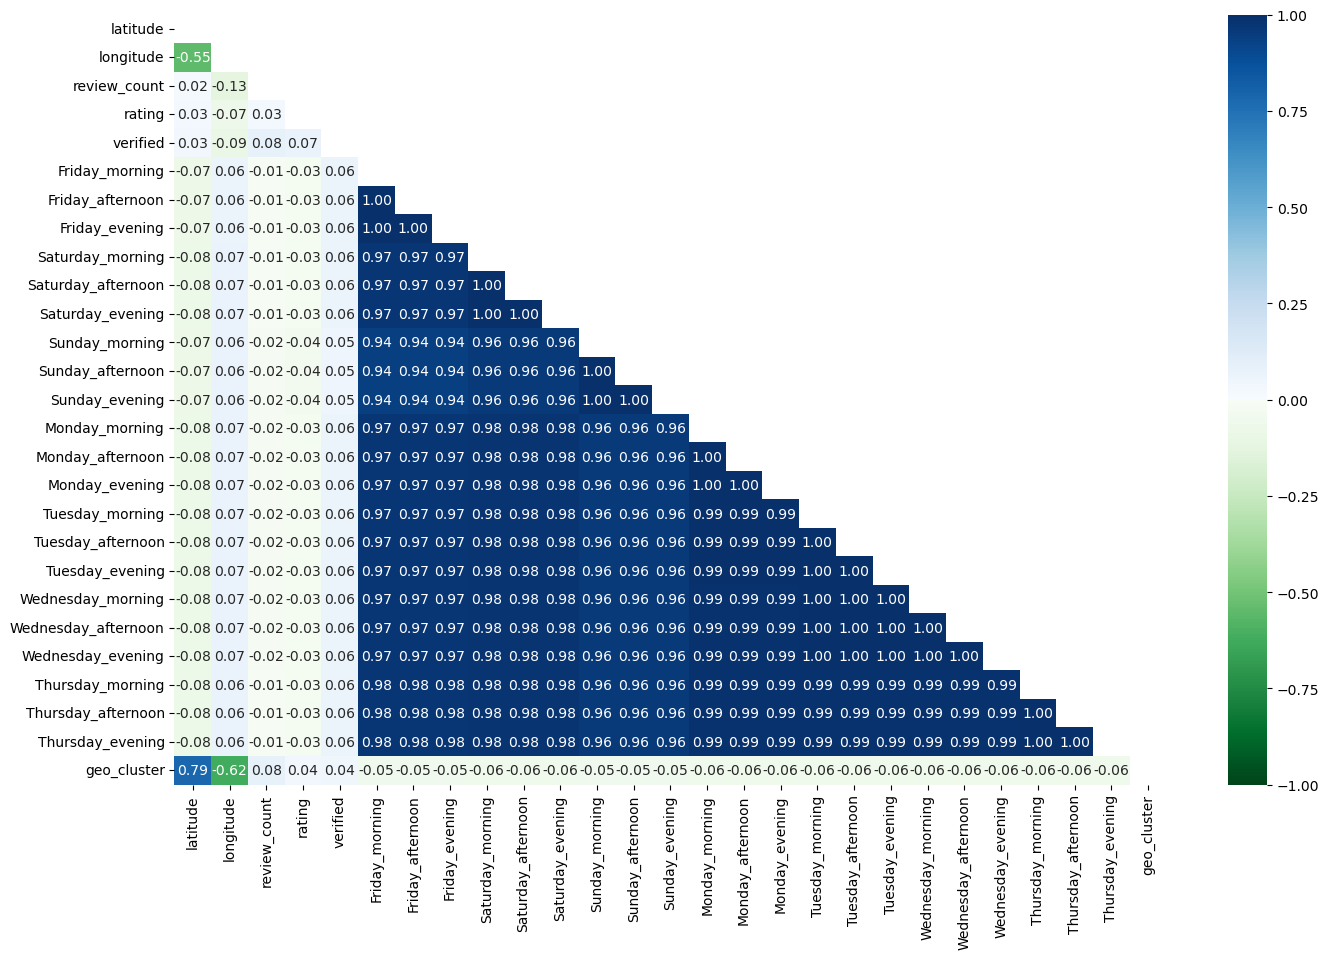

In [13]:
num_features = [name for name in X_train.columns if pd.api.types.is_numeric_dtype(X_train[name])]
plt.figure(figsize=(16, 10))
mask = np.triu(X_train[num_features].corr())
correlation_matrix = X_train[num_features].corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap=green_blue, mask=mask)

Conclusions: 
* The most correlated variables in the dataset are binary variables indicating business operation times on different days of the week (correlation coefficient higher than 0.96).
* The next strongly correlated variables are longitude and latitude, with a correlation coefficient of 0.55.

#### Business operation times analysis

In [14]:
bool_columns = ['Monday_morning', 'Monday_afternoon', 'Monday_evening',
                'Tuesday_morning', 'Tuesday_afternoon', 'Tuesday_evening',
                'Wednesday_morning', 'Wednesday_afternoon', 'Wednesday_evening',
                'Thursday_morning', 'Thursday_afternoon', 'Thursday_evening',
                'Friday_morning', 'Friday_afternoon', 'Friday_evening',
                'Saturday_morning', 'Saturday_afternoon', 'Saturday_evening',
                'Sunday_morning', 'Sunday_afternoon', 'Sunday_evening']
X_train_bool = X_train[bool_columns].reset_index(drop = True)

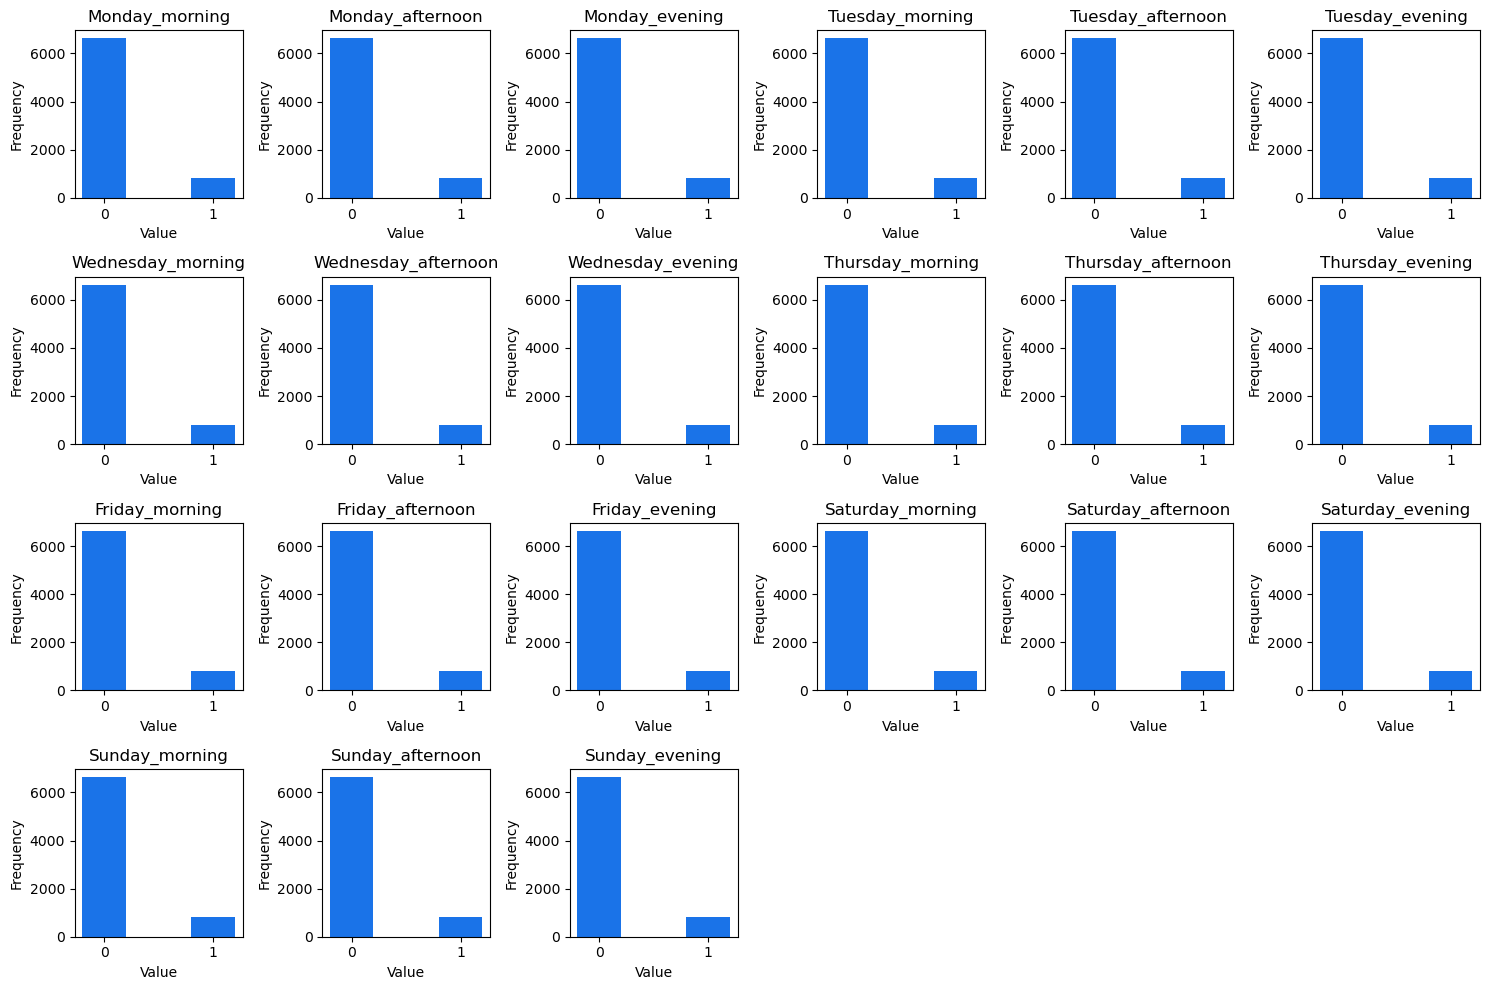

In [15]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(X_train_bool.columns):
    plt.subplot(4, 6, i + 1)
    plt.hist(X_train_bool[col], bins=[-0.25, 0.25, 0.75, 1.25], align='mid', color = '#1a73e8', rwidth=0.8)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xticks([0, 1])  
plt.tight_layout()
plt.show()


Conclusion: binary variables indicating if the business is operational on different times of the day on different day of the week have very similar value distribution

In [16]:
counts_df = X_train_bool.sum()
counts_df = pd.DataFrame(counts_df.values.reshape((3, 7),  order='F'), 
                         columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
counts_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,819,818,817,818,796,813,808
1,819,818,817,818,796,813,808
2,819,818,817,818,796,813,808


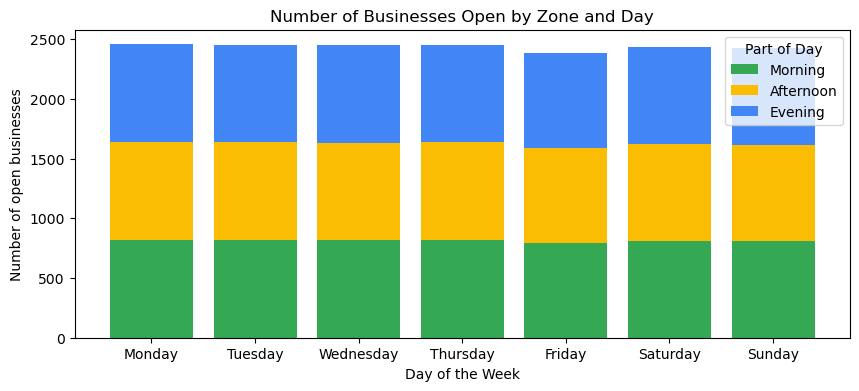

In [17]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
zones = ['Morning', 'Afternoon', 'Evening']

fig, ax = plt.subplots(figsize=(10, 4))
bottom = [0] * len(days) 
colors = ['#34a853', '#fbbc04', '#4285f4']

for i, zone in enumerate(zones):
    ax.bar(days, counts_df.iloc[i], bottom=bottom, label=zone, color=colors[i])
    bottom = [bottom[j] + counts_df.iloc[i][j] for j in range(len(days))]

ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of open businesses')
ax.set_title('Number of Businesses Open by Zone and Day')
ax.legend(title='Part of Day')
plt.show()

#### Analysis of Numerical Columns

In [18]:
numeric_columns = ['latitude', 'longitude', 'review_count', 'rating']
X_train_num = X_train[numeric_columns].reset_index(drop = True)

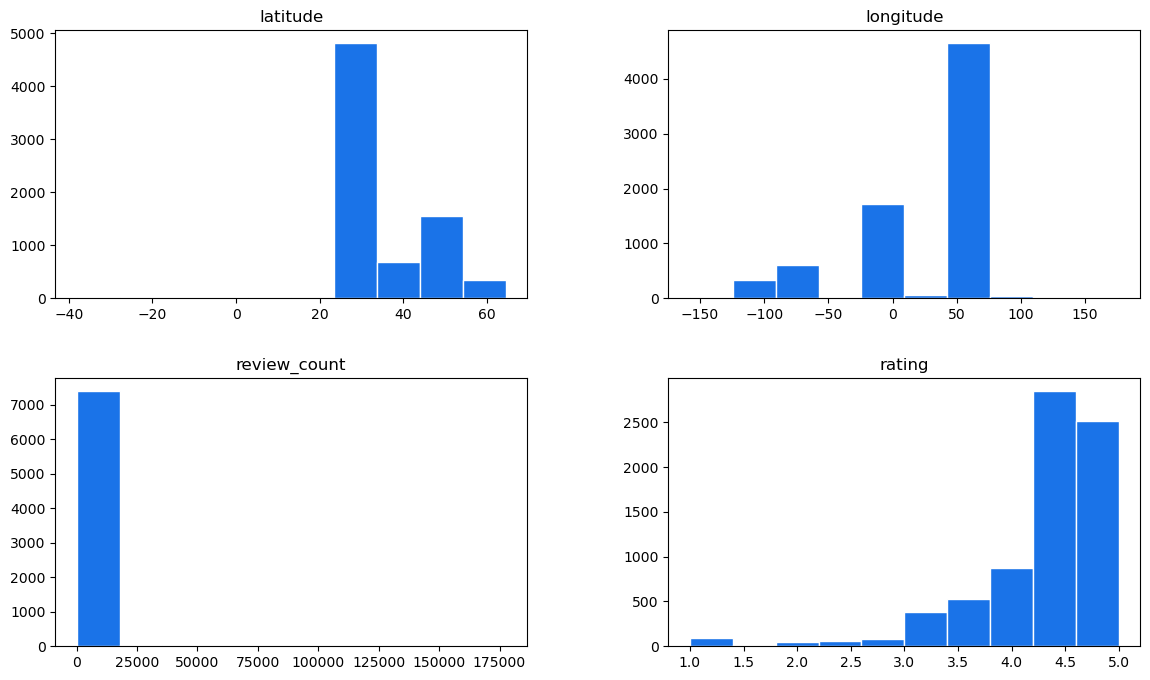

In [19]:
X_train_num.hist(bins = 10, figsize=(14, 8), align='mid', color = '#1a73e8', edgecolor='white', grid=False)
plt.show()

### Map

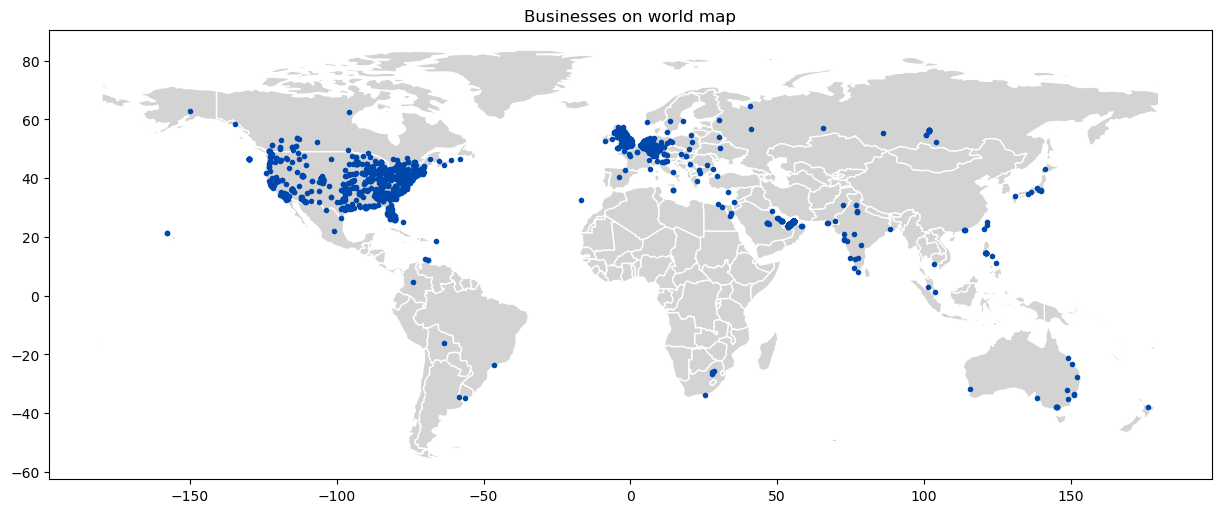

In [23]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(X_train, geometry=gpd.points_from_xy(X_train['longitude'], X_train['latitude']))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica")]

world.plot(figsize=(15, 7), color='lightgray', edgecolor='white')

gdf.plot(ax=plt.gca(), marker='o', color='#0047AB', markersize=9)

plt.title('Businesses on world map')
plt.show()

##### Country

In [85]:
X_train_country = X_train.groupby('country').size().reset_index(name='NumberOfBusinessInCountry')
X_train_country.shape
print(X_train_country.to_string(index=False))

                       country  NumberOfBusinessInCountry
                    AB, Canada                          7
                            AK                          2
                            AL                         22
                            AR                          9
                            AZ                         11
                     Argentina                          1
    Arkhangelsk Oblast, Russia                          1
                         Aruba                          1
                     Australia                         14
                    BC, Canada                         11
                       Bahamas                          1
                       Bahrain                          1
                       Belarus                          1
                       Belgium                         32
                        Brazil                          1
                      Bulgaria                          3
              

In some rows in the 'country' column, there are both city names and countries. Before starting the analysis, we will organize this column by removing the city names

In [86]:
def extract_country(city_country):
    if ',' in city_country:
        return city_country.split(',')[1].strip() 
    else:
        return city_country

X_train_country['country'] = X_train_country['country'].apply(lambda x: extract_country(x))
print(X_train_country.to_string(index=False))

                     country  NumberOfBusinessInCountry
                      Canada                          7
                          AK                          2
                          AL                         22
                          AR                          9
                          AZ                         11
                   Argentina                          1
                      Russia                          1
                       Aruba                          1
                   Australia                         14
                      Canada                         11
                     Bahamas                          1
                     Bahrain                          1
                     Belarus                          1
                     Belgium                         32
                      Brazil                          1
                    Bulgaria                          3
                          CA                    

In [87]:
X_train_country = X_train_country.groupby('country')['NumberOfBusinessInCountry'].sum().reset_index()
print(X_train_country.to_string(index=False))

                     country  NumberOfBusinessInCountry
                          AK                          2
                          AL                         22
                          AR                          9
                          AZ                         11
                   Argentina                          1
                       Aruba                          1
                   Australia                         14
                     Bahamas                          1
                     Bahrain                          1
                     Belarus                          1
                     Belgium                         32
                      Brazil                          1
                    Bulgaria                          3
                          CA                         72
                          CO                         38
                          CT                          6
                    Cambodia                    

(106, 2)

In [21]:
# # import the library
# import folium

# # Make an empty map
# m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# # Show the map
# # add marker one by one on the map
# for i in range(0,len(df)):
#    folium.Marker(
#       location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
#       popup=df.iloc[i]['name'],
#    ).add_to(m)

# # Show the map again
# m
